<font color = red><font size = 5>Importing Libraries</font>

In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
import sys
import types
import os

<font color = red><font size = 4> Loading Dataset </font>

In [2]:
furniture = pd.read_csv("Super_Store.csv", encoding='cp1252')
furniture.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [3]:
# Checking structure of the data
furniture.shape

(2121, 21)

In [4]:
furniture.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

<font color = red><font size = 4> Statistical Summary</font>

In [5]:
furniture.describe().T

,count,mean,std,min,25%,50%,75%,max
Row ID,2121.0,5041.643564,2885.740258,1.0000,2568.000,5145.0000,7534.0000,9991.000
Postal Code,2121.0,55726.556341,32261.888225,1040.0000,22801.000,60505.0000,90032.0000,99301.000
Sales,2121.0,349.834887,503.179145,1.8920,47.040,182.2200,435.1680,4416.174
Quantity,2121.0,3.785007,2.251620,1.0000,2.000,3.0000,5.0000,14.000
Discount,2121.0,0.173923,0.181547,0.0000,0.000,0.2000,0.3000,0.700
Profit,2121.0,8.699327,136.049246,-1862.3124,-12.849,7.7748,33.7266,1013.127


<font color = red><font size = 4> Checking Data Type and Missing Values </font>

In [6]:
# summary of the data 
furniture.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

<font color = red><font size = 4>Checking the furniture sales time stamp</font>

In [7]:
furniture['Order Date'].min(), furniture['Order Date'].max()

('1/1/2017', '9/9/2017')

In [8]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [9]:
furniture.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2121 entries, 845 to 964
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  2121 non-null   object 
 1   Sales       2121 non-null   float64
dtypes: float64(1), object(1)
memory usage: 49.7+ KB


In [10]:
furniture["Order Date"].value_counts()

Order Date
9/5/2016      10
10/30/2017     9
12/1/2016      9
11/19/2017     9
12/25/2016     9
              ..
6/17/2017      1
2/3/2017       1
6/17/2014      1
2/4/2016       1
10/23/2016     1
Name: count, Length: 889, dtype: int64

In [11]:
furniture.head()

,Order Date,Sales
845,1/1/2017,474.430
1707,1/1/2017,141.420
1708,1/1/2017,310.744
179,1/1/2017,48.896
181,1/10/2014,51.940


<font color = red><font size = 3>Aggregate sales data by date</font>

In [12]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture

,Order Date,Sales
0,1/1/2017,975.4900
1,1/10/2014,51.9400
2,1/10/2015,1018.1040
3,1/10/2016,104.7700
4,1/11/2014,9.9400
...,...,...
884,9/8/2016,3374.9816
885,9/8/2017,1000.2390
886,9/9/2014,864.0240
887,9/9/2016,15.0080


Indexing with the Time Series Data

In [13]:
furniture["Order Date"].value_counts()

Order Date
1/1/2017      1
6/16/2014     1
6/11/2017     1
6/12/2015     1
6/12/2016     1
             ..
12/28/2017    1
12/29/2014    1
12/29/2016    1
12/29/2017    1
9/9/2017      1
Name: count, Length: 889, dtype: int64

In [14]:
furniture['Order Date'] = pd.to_datetime(furniture['Order Date'])
furniture.sort_values(by="Order Date", inplace=True)

In [15]:
furniture["Order Date"].min() 

Timestamp('2014-01-06 00:00:00')

In [16]:
furniture["Order Date"].max()

Timestamp('2017-12-30 00:00:00')

In [17]:
furniture

,Order Date,Sales
49,2014-01-06,2573.8200
50,2014-01-07,76.7280
1,2014-01-10,51.9400
4,2014-01-11,9.9400
7,2014-01-13,879.9390
...,...,...
290,2017-12-24,1393.4940
293,2017-12-25,832.4540
300,2017-12-28,551.2568
303,2017-12-29,2330.7180


In [18]:
furniture.set_index('Order Date', inplace=True)
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

Resampling the datetime data. Here we use the start of each month as the timestamp and take the average daily sales value for a particular month since working with the current datetime data becomes tricky

In [19]:
furniture.to_csv("df.csv")

<Axes: xlabel='Order Date'>

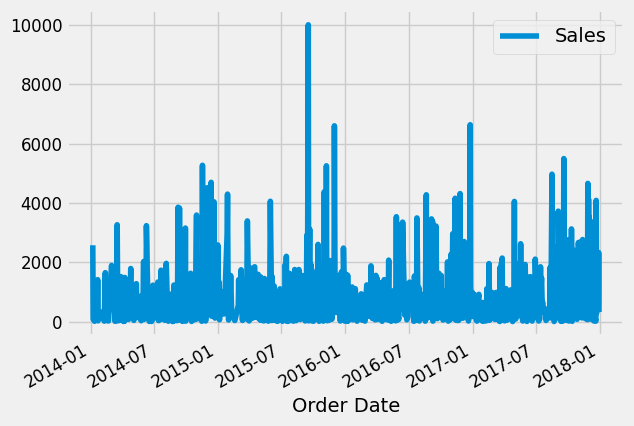

In [20]:
furniture.plot()

In [21]:
y = furniture['Sales'].resample('MS').mean() 

In [22]:
y

Order Date
2014-01-01     480.194231
2014-02-01     367.931600
2014-03-01     857.291529
2014-04-01     567.488357
2014-05-01     432.049188
2014-06-01     695.059242
2014-07-01     601.169500
2014-08-01     457.521656
2014-09-01     992.353367
2014-10-01     769.015437
2014-11-01     980.221486
2014-12-01    1532.298325
2015-01-01     978.328467
2015-02-01     522.395667
2015-03-01     781.236437
2015-04-01     805.822962
2015-05-01     624.996700
2015-06-01     428.565500
2015-07-01     719.706316
2015-08-01     602.412012
2015-09-01    1382.790684
2015-10-01     632.980184
2015-11-01    1286.701354
2015-12-01    1049.355418
2016-01-01     508.182867
2016-02-01     356.868273
2016-03-01     609.575810
2016-04-01     695.373158
2016-05-01     687.265227
2016-06-01     816.910750
2016-07-01     768.736412
2016-08-01     734.307782
2016-09-01    1135.953371
2016-10-01     624.872474
2016-11-01    1271.345152
2016-12-01    1410.719808
2017-01-01     397.602133
2017-02-01     528.179800
2

In [23]:
y['2017':]

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

<font color = red><font size = 5>Visualizing Furniture Sales Time Series Data</font>

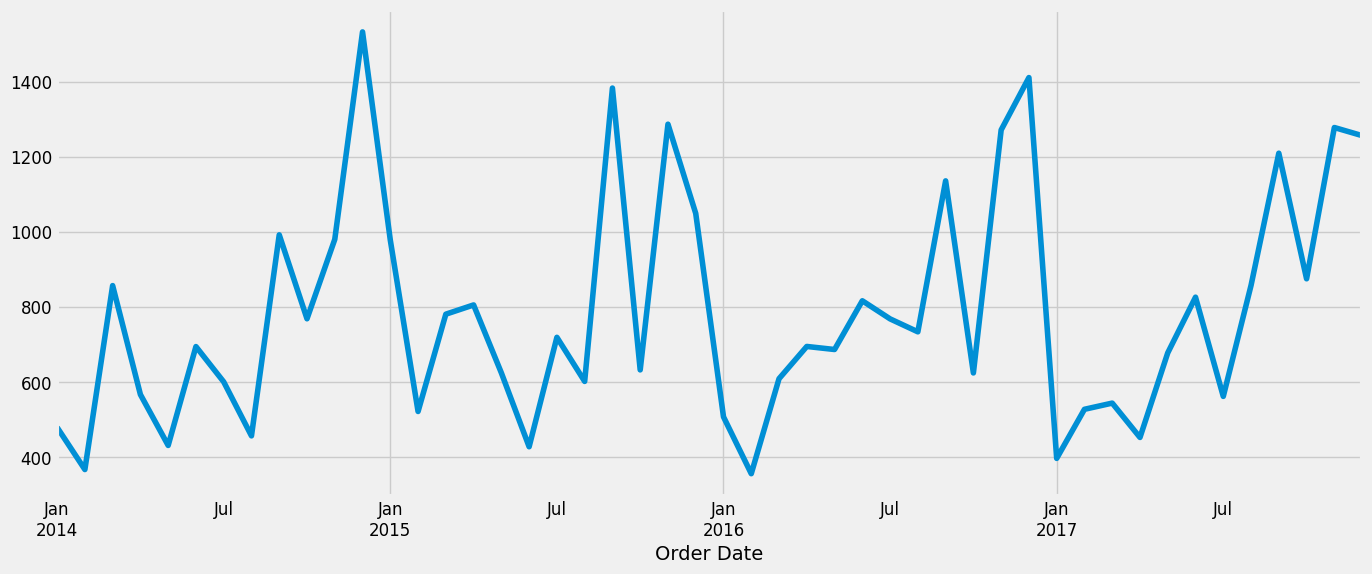

In [24]:
y.plot(figsize=(15, 6))
plt.show()

The plot clearly indicates that the time series has seasonality pattern.The sales are always low at the beginning of the year and high at the end of the year. There is always an upward trend within any single year with a couple of low months in the mid of the year

In [25]:
train = y[:'2017-06-01']
test = y['2017-07-01':]

<font color = red><font size = 5> Single Exponential Smoothing </font>

In [26]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [27]:
# our guessed parameters
alpha = 0.4
beta = 0.2
gamma = 0.01

# initialise model
ets_model = ExponentialSmoothing(train, trend='mul', seasonal='mul', seasonal_periods=12)
ets_fit = ets_model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)

In [28]:
fcast = ets_fit.forecast(steps=12)
fcast

2017-07-01     741.423179
2017-08-01     673.046733
2017-09-01    1284.856839
2017-10-01     756.386742
2017-11-01    1368.828294
2017-12-01    1556.822687
2018-01-01     786.231093
2018-02-01     591.221412
2018-03-01     920.412321
2018-04-01     861.026185
2018-05-01     808.159743
2018-06-01     947.976308
Freq: MS, dtype: float64

In [29]:
test

Order Date
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

In [30]:
print("MSE: ", np.mean((test-fcast)**2))
print("MAE: ",np.mean(np.abs((test-fcast))))

MSE:  30766.481756841287
MAE:  158.26537848077865


In [31]:
def ETS_auto(train, test,alpha=[None], beta=[None], gamma=[None]):
    best_alpha=0
    best_beta=0
    best_gamma=0
    best_mae=None
    for i in alpha:
        for j in beta:
            for k in gamma:  
                ets_model = ExponentialSmoothing(train, trend='mul', seasonal='mul', seasonal_periods=12)
                ets_fit = ets_model.fit(smoothing_level=i, smoothing_slope=j, smoothing_seasonal=k)
                fcast = ets_fit.forecast(steps=6)
                mae=np.mean(np.abs((test-fcast)))
                if best_mae is None or best_mae >mae:
                    best_mae=mae
                    best_alpha=i
                    best_beta=j
                    best_gamma=k
    best_params={"alpha":i, "beta":j, "gamma":k,"mae":best_mae}
    return best_params       

In [32]:
import numpy as np
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing

def auto_hwm(timeseries, val_split_date, alpha=[None], beta=[None], gamma=[None], phi=[None], 
              trend=None, seasonal=None, periods=None, verbose=False):

    

    best_params = []
    actual = timeseries[val_split_date:]

    print('Evaluating Exponential Smoothing model for', len(alpha) * len(beta) * len(gamma) * len(phi), 'fits\n')

    for a in alpha:
        for b in beta:
            for g in gamma:
                for p in phi:

                    if(verbose == True):
                        print('Checking for', {'alpha': a, 'beta': b, 'gamma': g, 'phi': p})

                    model = ExponentialSmoothing(timeseries, trend=trend, seasonal=seasonal, seasonal_periods=periods)
                    model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g, damping_slope=p)
                    f_cast = model.predict(model.params, start=actual.index[0])
                    score = np.float64(mean_absolute_error(actual, f_cast)).mean()

                    best_params.append({'alpha': a, 'beta': b, 'gamma': g, 'phi': p, 'mae': score})

    return min(best_params, key=lambda x: x['mae'])


In [33]:
auto_hwm(y, val_split_date = '2017-06-01', 
         alpha = np.linspace(0,0.5,5), 
         beta = np.linspace(0,0.5,5), 
         gamma = np.linspace(0,0.5,5), 
         trend='mul', 
         seasonal='mul', 
         periods=12, verbose=True)

Evaluating Exponential Smoothing model for 125 fits

Checking for {'alpha': 0.0, 'beta': 0.0, 'gamma': 0.0, 'phi': None}
Checking for {'alpha': 0.0, 'beta': 0.0, 'gamma': 0.125, 'phi': None}
Checking for {'alpha': 0.0, 'beta': 0.0, 'gamma': 0.25, 'phi': None}
Checking for {'alpha': 0.0, 'beta': 0.0, 'gamma': 0.375, 'phi': None}
Checking for {'alpha': 0.0, 'beta': 0.0, 'gamma': 0.5, 'phi': None}
Checking for {'alpha': 0.0, 'beta': 0.125, 'gamma': 0.0, 'phi': None}
Checking for {'alpha': 0.0, 'beta': 0.125, 'gamma': 0.125, 'phi': None}
Checking for {'alpha': 0.0, 'beta': 0.125, 'gamma': 0.25, 'phi': None}
Checking for {'alpha': 0.0, 'beta': 0.125, 'gamma': 0.375, 'phi': None}
Checking for {'alpha': 0.0, 'beta': 0.125, 'gamma': 0.5, 'phi': None}
Checking for {'alpha': 0.0, 'beta': 0.25, 'gamma': 0.0, 'phi': None}
Checking for {'alpha': 0.0, 'beta': 0.25, 'gamma': 0.125, 'phi': None}
Checking for {'alpha': 0.0, 'beta': 0.25, 'gamma': 0.25, 'phi': None}
Checking for {'alpha': 0.0, 'beta': 0

c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  

Checking for {'alpha': 0.125, 'beta': 0.25, 'gamma': 0.0, 'phi': None}
Checking for {'alpha': 0.125, 'beta': 0.25, 'gamma': 0.125, 'phi': None}
Checking for {'alpha': 0.125, 'beta': 0.25, 'gamma': 0.25, 'phi': None}
Checking for {'alpha': 0.125, 'beta': 0.25, 'gamma': 0.375, 'phi': None}
Checking for {'alpha': 0.125, 'beta': 0.25, 'gamma': 0.5, 'phi': None}
Checking for {'alpha': 0.125, 'beta': 0.375, 'gamma': 0.0, 'phi': None}
Checking for {'alpha': 0.125, 'beta': 0.375, 'gamma': 0.125, 'phi': None}
Checking for {'alpha': 0.125, 'beta': 0.375, 'gamma': 0.25, 'phi': None}
Checking for {'alpha': 0.125, 'beta': 0.375, 'gamma': 0.375, 'phi': None}
Checking for {'alpha': 0.125, 'beta': 0.375, 'gamma': 0.5, 'phi': None}
Checking for {'alpha': 0.125, 'beta': 0.5, 'gamma': 0.0, 'phi': None}
Checking for {'alpha': 0.125, 'beta': 0.5, 'gamma': 0.125, 'phi': None}
Checking for {'alpha': 0.125, 'beta': 0.5, 'gamma': 0.25, 'phi': None}
Checking for {'alpha': 0.125, 'beta': 0.5, 'gamma': 0.375, 'ph

{'alpha': 0.25,
 'beta': 0.0,
 'gamma': 0.0,
 'phi': None,
 'mae': 101.03153844864019}

In [34]:
# best parameters
alpha = 0.125
beta = 0.375
gamma = 0

# initialise model
ets_model = ExponentialSmoothing(y, trend='mul', seasonal='mul', seasonal_periods=12)
ets_fit = ets_model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)

In [35]:
fcast = ets_fit.forecast(steps=12)

In [36]:
fcast

2018-01-01     679.902019
2018-02-01     529.622863
2018-03-01     829.538654
2018-04-01     737.774071
2018-05-01     732.251045
2018-06-01     781.096379
2018-07-01     815.626156
2018-08-01     830.131829
2018-09-01    1454.141160
2018-10-01     900.265092
2018-11-01    1525.660229
2018-12-01    1689.218376
Freq: MS, dtype: float64

<font color = red><font size = 5>Checking Stationarity </font>

In [37]:
from statsmodels.tsa.stattools import adfuller

In [38]:
adfuller(y)

(-5.191070187339274,
 9.1687566556655e-06,
 10,
 37,
 {'1%': -3.6209175221605827,
  '5%': -2.9435394610388332,
  '10%': -2.6104002410518627},
 521.9616303121272)

In [39]:
from pandas import Series
from statsmodels.tsa.stattools import adfuller
result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.191070
p-value: 0.000009
Critical Values:
	1%: -3.621
	5%: -2.944
	10%: -2.610


We can see that our statistic value of -5.191070 is less than the value of -3.621 at 1%. This suggests that we can reject the null hypothesis with a significance level of less than 1% (i.e. a low probability that the result is a statistical fluke). Rejecting the null hypothesis means that the process has no unit root, and in turn that the time series is stationary or does not have time-dependent structure.

The p-value is 0.000009, which is way below the threshold (0.05). Hence the null-hypothesis is rejected. It suggests the time series does not have a unit root, meaning it is stationary.

<font color = red><font size = 5>Decomposing : </font></br>
<font color = black><font size = 3>Decomposing the time series into three distinct components: trend, seasonality, and noise.</font>

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(y, model='multiplicative',  two_sided=False, extrapolate_trend=4)
decomposition

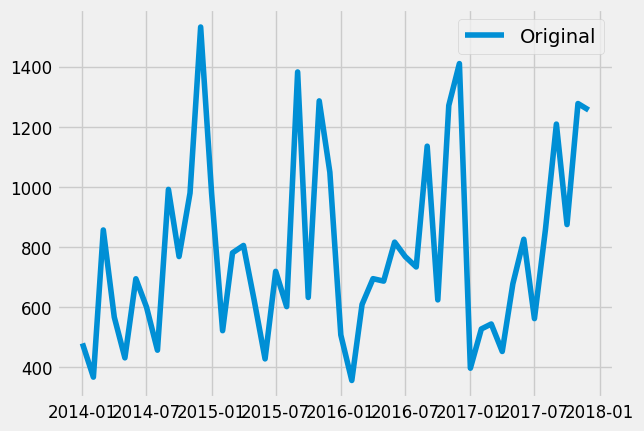

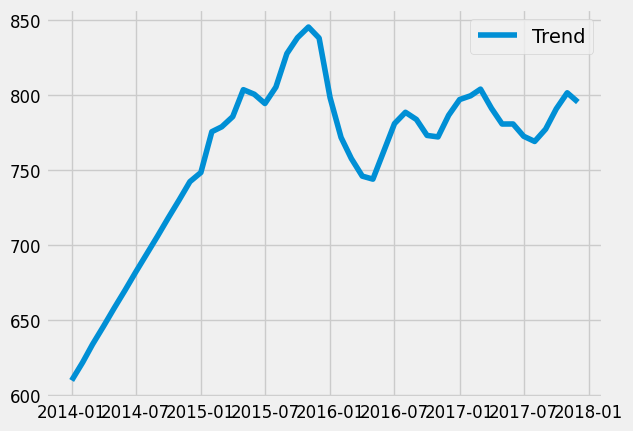

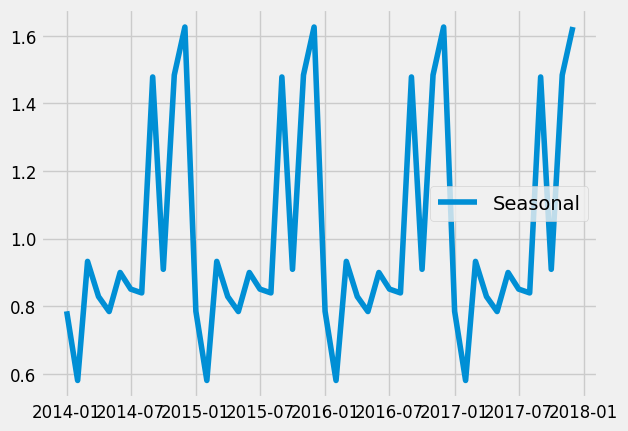

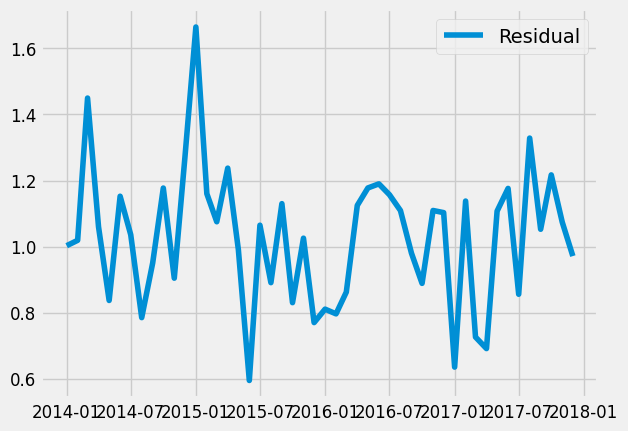

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(y, model='multiplicative',  two_sided=False, extrapolate_trend=4)

plt.plot(y, label = 'Original')
plt.legend(loc = 'best')

trend = decomposition.trend
plt.show()
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')

residual = decomposition.resid
plt.show()
plt.plot(residual, label = 'Residual')
plt.legend(loc='best')

By visualizing the decomposed components of the original time series we can say that the sales of furniture is unstable, along with its obvious seasonality.

<font color = red><font size = 5>Forecasting</font>

<font color = red><font size = 4>Time Series Forecasting using ARIMA</font></br>
<font color = black><font size = 2>We will use ARIMA for forecasting our time series. ARIMA is also denoted as ARIMA(p,d,q) where p,d,q accounts for seasonality, trend and noise in the time series data</font>

In [42]:
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))

seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 2, 12)
SARIMAX: (0, 0, 2) x (0, 1, 0, 12)
SARIMAX: (0, 0, 2) x (0, 1, 1, 12)


<font color = red><font size = 4>Parameter Selection </font></br>
<font color = black><font size = 2>We use “grid search” to find the optimal set of parameters that yields the best performance for our model.

In [43]:
from pylab import rcParams
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order=param,
seasonal_order=param_seasonal,
enforce_stationarity=False, 
enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:769.0817523205915
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1376.2755826218497
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:354.7862732411514
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:477.7170130920111
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:302.27028997936003


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:146.88834672428874
ARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:336.95366048588164
ARIMA(0, 0, 0)x(0, 2, 1, 12)12 - AIC:149.84561033293159
ARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:497.23144334183365
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1278.1688813825808


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:309.56039684302846
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:318.0047199116341
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:304.24882803008137
ARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:148.83996706808242
ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:162.12029487165506
ARIMA(0, 0, 0)x(1, 2, 1, 12)12 - AIC:151.35761674830633
ARIMA(0, 0, 0)x(1, 2, 2, 12)12 - AIC:8.0
ARIMA(0, 0, 0)x(2, 0, 0, 12)12 - AIC:319.96929434508735


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(2, 0, 1, 12)12 - AIC:946.2587115701066
ARIMA(0, 0, 0)x(2, 0, 2, 12)12 - AIC:307.89818464737334
ARIMA(0, 0, 0)x(2, 1, 0, 12)12 - AIC:159.5144730671919


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(2, 1, 1, 12)12 - AIC:161.29079485585527
ARIMA(0, 0, 0)x(2, 1, 2, 12)12 - AIC:150.77405841140103
ARIMA(0, 0, 0)x(2, 2, 0, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(2, 2, 1, 12)12 - AIC:8.0
ARIMA(0, 0, 0)x(2, 2, 2, 12)12 - AIC:10.0
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:720.9252270758095
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2673.1072596186937
ARIMA(0, 0, 1)x(0, 0, 2, 12)12 - AIC:323.4436688558341
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:466.56074298091437


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:291.6261389673287
ARIMA(0, 0, 1)x(0, 1, 2, 12)12 - AIC:135.8829359895526
ARIMA(0, 0, 1)x(0, 2, 0, 12)12 - AIC:324.41357896713566
ARIMA(0, 0, 1)x(0, 2, 1, 12)12 - AIC:136.53719210574513
ARIMA(0, 0, 1)x(0, 2, 2, 12)12 - AIC:8.0


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:499.5665720564813
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2528.6245814098006


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 0, 2, 12)12 - AIC:299.1199989025949
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:319.9884876946865
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:291.8725576458952
ARIMA(0, 0, 1)x(1, 1, 2, 12)12 - AIC:137.6340991455565
ARIMA(0, 0, 1)x(1, 2, 0, 12)12 - AIC:163.98834428111348
ARIMA(0, 0, 1)x(1, 2, 1, 12)12 - AIC:137.70652786351843
ARIMA(0, 0, 1)x(1, 2, 2, 12)12 - AIC:10.0
ARIMA(0, 0, 1)x(2, 0, 0, 12)12 - AIC:321.96452770305734
ARIMA(0, 0, 1)x(2, 0, 1, 12)12 - AIC:929.5302653272922


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(2, 0, 2, 12)12 - AIC:296.9826016384092
ARIMA(0, 0, 1)x(2, 1, 0, 12)12 - AIC:160.85410049250052
ARIMA(0, 0, 1)x(2, 1, 1, 12)12 - AIC:162.63152999199508


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(2, 1, 2, 12)12 - AIC:134.84092696801008
ARIMA(0, 0, 1)x(2, 2, 0, 12)12 - AIC:8.0
ARIMA(0, 0, 1)x(2, 2, 1, 12)12 - AIC:10.0
ARIMA(0, 0, 1)x(2, 2, 2, 12)12 - AIC:12.0
ARIMA(0, 0, 2)x(0, 0, 0, 12)12 - AIC:695.9854310935226
ARIMA(0, 0, 2)x(0, 0, 1, 12)12 - AIC:2533.305816992043


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 2)x(0, 0, 2, 12)12 - AIC:311.1637201320492
ARIMA(0, 0, 2)x(0, 1, 0, 12)12 - AIC:455.2093474618755
ARIMA(0, 0, 2)x(0, 1, 1, 12)12 - AIC:279.996668914431


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 2)x(0, 1, 2, 12)12 - AIC:121.513209687251
ARIMA(0, 0, 2)x(0, 2, 0, 12)12 - AIC:311.8417385725343
ARIMA(0, 0, 2)x(0, 2, 1, 12)12 - AIC:121.64768702815829
ARIMA(0, 0, 2)x(0, 2, 2, 12)12 - AIC:10.0


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 2)x(1, 0, 0, 12)12 - AIC:501.0295209335852


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 2)x(1, 0, 1, 12)12 - AIC:2274.696753228719


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 2)x(1, 0, 2, 12)12 - AIC:286.18341540780096
ARIMA(0, 0, 2)x(1, 1, 0, 12)12 - AIC:321.8800584473878
ARIMA(0, 0, 2)x(1, 1, 1, 12)12 - AIC:281.78833393066


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 2)x(1, 1, 2, 12)12 - AIC:122.18811026144748
ARIMA(0, 0, 2)x(1, 2, 0, 12)12 - AIC:164.18237603491778
ARIMA(0, 0, 2)x(1, 2, 1, 12)12 - AIC:123.96143952092115
ARIMA(0, 0, 2)x(1, 2, 2, 12)12 - AIC:12.0
ARIMA(0, 0, 2)x(2, 0, 0, 12)12 - AIC:323.58227595886615


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 2)x(2, 0, 1, 12)12 - AIC:877.5425886467093


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 2)x(2, 0, 2, 12)12 - AIC:285.944631320914
ARIMA(0, 0, 2)x(2, 1, 0, 12)12 - AIC:163.57819530872865
ARIMA(0, 0, 2)x(2, 1, 1, 12)12 - AIC:164.35074076256276


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 2)x(2, 1, 2, 12)12 - AIC:122.10828559186982
ARIMA(0, 0, 2)x(2, 2, 0, 12)12 - AIC:10.0
ARIMA(0, 0, 2)x(2, 2, 1, 12)12 - AIC:12.0
ARIMA(0, 0, 2)x(2, 2, 2, 12)12 - AIC:14.0
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:677.8947668414504
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1404.511010860967
ARIMA(0, 1, 0)x(0, 0, 2, 12)12 - AIC:315.54758780435515
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:486.63785671402354


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:304.96712281679635
ARIMA(0, 1, 0)x(0, 1, 2, 12)12 - AIC:139.90087903188373
ARIMA(0, 1, 0)x(0, 2, 0, 12)12 - AIC:334.9778123201552
ARIMA(0, 1, 0)x(0, 2, 1, 12)12 - AIC:139.41258910452575
ARIMA(0, 1, 0)x(0, 2, 2, 12)12 - AIC:6.0
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:497.7889663004408


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1181.9956249356317
ARIMA(0, 1, 0)x(1, 0, 2, 12)12 - AIC:306.3042741398156
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:319.7714068109212
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:306.9113200151422


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(1, 1, 2, 12)12 - AIC:141.9492884092156
ARIMA(0, 1, 0)x(1, 2, 0, 12)12 - AIC:152.42852106596334


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(1, 2, 1, 12)12 - AIC:141.41133369593382
ARIMA(0, 1, 0)x(1, 2, 2, 12)12 - AIC:8.0
ARIMA(0, 1, 0)x(2, 0, 0, 12)12 - AIC:317.69402237661177
ARIMA(0, 1, 0)x(2, 0, 1, 12)12 - AIC:978.5369726490882


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(2, 0, 2, 12)12 - AIC:307.0475142657875
ARIMA(0, 1, 0)x(2, 1, 0, 12)12 - AIC:153.33829187964875
ARIMA(0, 1, 0)x(2, 1, 1, 12)12 - AIC:155.03846231505918


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(2, 1, 2, 12)12 - AIC:143.8124253811778
ARIMA(0, 1, 0)x(2, 2, 0, 12)12 - AIC:6.0
ARIMA(0, 1, 0)x(2, 2, 1, 12)12 - AIC:8.0
ARIMA(0, 1, 0)x(2, 2, 2, 12)12 - AIC:10.0
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:649.905617681688


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:2488.723611476449
ARIMA(0, 1, 1)x(0, 0, 2, 12)12 - AIC:295.4984100601973
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:458.8705548483014
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:279.5806233372343
ARIMA(0, 1, 1)x(0, 1, 2, 12)12 - AIC:124.25148374133651
ARIMA(0, 1, 1)x(0, 2, 0, 12)12 - AIC:317.19576972399113
ARIMA(0, 1, 1)x(0, 2, 1, 12)12 - AIC:123.1877419593564
ARIMA(0, 1, 1)x(0, 2, 2, 12)12 - AIC:8.0
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:486.18329774427525


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:2465.0460826278813


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(1, 0, 2, 12)12 - AIC:289.0207496247915
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:310.75743684173585
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:281.5576621461245
ARIMA(0, 1, 1)x(1, 1, 2, 12)12 - AIC:126.0774115713321
ARIMA(0, 1, 1)x(1, 2, 0, 12)12 - AIC:154.41754102599276
ARIMA(0, 1, 1)x(1, 2, 1, 12)12 - AIC:125.15199078580065
ARIMA(0, 1, 1)x(1, 2, 2, 12)12 - AIC:10.0
ARIMA(0, 1, 1)x(2, 0, 0, 12)12 - AIC:311.85906742410657


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(2, 0, 1, 12)12 - AIC:950.6432506903142
ARIMA(0, 1, 1)x(2, 0, 2, 12)12 - AIC:287.50889544014785
ARIMA(0, 1, 1)x(2, 1, 0, 12)12 - AIC:149.57227369322186
ARIMA(0, 1, 1)x(2, 1, 1, 12)12 - AIC:151.43439374610517


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(2, 1, 2, 12)12 - AIC:128.0753489078108
ARIMA(0, 1, 1)x(2, 2, 0, 12)12 - AIC:8.0
ARIMA(0, 1, 1)x(2, 2, 1, 12)12 - AIC:10.0
ARIMA(0, 1, 1)x(2, 2, 2, 12)12 - AIC:12.0
ARIMA(0, 1, 2)x(0, 0, 0, 12)12 - AIC:634.8844283595578
ARIMA(0, 1, 2)x(0, 0, 1, 12)12 - AIC:2332.266951633066


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 2)x(0, 0, 2, 12)12 - AIC:283.6008764405975
ARIMA(0, 1, 2)x(0, 1, 0, 12)12 - AIC:447.58573969527447
ARIMA(0, 1, 2)x(0, 1, 1, 12)12 - AIC:269.8325945163813
ARIMA(0, 1, 2)x(0, 1, 2, 12)12 - AIC:109.97825475313083
ARIMA(0, 1, 2)x(0, 2, 0, 12)12 - AIC:305.03445359430805
ARIMA(0, 1, 2)x(0, 2, 1, 12)12 - AIC:112.17910628369151
ARIMA(0, 1, 2)x(0, 2, 2, 12)12 - AIC:10.0
ARIMA(0, 1, 2)x(1, 0, 0, 12)12 - AIC:487.4986912679796
ARIMA(0, 1, 2)x(1, 0, 1, 12)12 - AIC:1172.638220031588
ARIMA(0, 1, 2)x(1, 0, 2, 12)12 - AIC:276.4075358740031
ARIMA(0, 1, 2)x(1, 1, 0, 12)12 - AIC:310.73389307255576
ARIMA(0, 1, 2)x(1, 1, 1, 12)12 - AIC:271.7935696069856


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 2)x(1, 1, 2, 12)12 - AIC:113.19032296223335
ARIMA(0, 1, 2)x(1, 2, 0, 12)12 - AIC:154.69701034327406


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 2)x(1, 2, 1, 12)12 - AIC:113.38656692456206
ARIMA(0, 1, 2)x(1, 2, 2, 12)12 - AIC:12.0
ARIMA(0, 1, 2)x(2, 0, 0, 12)12 - AIC:313.4823847170164


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 2)x(2, 0, 1, 12)12 - AIC:831.7358166407977
ARIMA(0, 1, 2)x(2, 0, 2, 12)12 - AIC:275.7436506591645
ARIMA(0, 1, 2)x(2, 1, 0, 12)12 - AIC:151.19056458654197


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 2)x(2, 1, 1, 12)12 - AIC:153.01413134829065


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 2)x(2, 1, 2, 12)12 - AIC:113.91244536736431
ARIMA(0, 1, 2)x(2, 2, 0, 12)12 - AIC:10.0
ARIMA(0, 1, 2)x(2, 2, 1, 12)12 - AIC:12.0
ARIMA(0, 1, 2)x(2, 2, 2, 12)12 - AIC:14.0
ARIMA(0, 2, 0)x(0, 0, 0, 12)12 - AIC:710.112555708784


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 0)x(0, 0, 1, 12)12 - AIC:1538.982629818451
ARIMA(0, 2, 0)x(0, 0, 2, 12)12 - AIC:319.1317032099982
ARIMA(0, 2, 0)x(0, 1, 0, 12)12 - AIC:509.89680953130835
ARIMA(0, 2, 0)x(0, 1, 1, 12)12 - AIC:315.5897398007573
ARIMA(0, 2, 0)x(0, 1, 2, 12)12 - AIC:128.86001461829787
ARIMA(0, 2, 0)x(0, 2, 0, 12)12 - AIC:342.9544200829582
ARIMA(0, 2, 0)x(0, 2, 1, 12)12 - AIC:127.63190004606327
ARIMA(0, 2, 0)x(0, 2, 2, 12)12 - AIC:6.0
ARIMA(0, 2, 0)x(1, 0, 0, 12)12 - AIC:520.887712617653
ARIMA(0, 2, 0)x(1, 0, 1, 12)12 - AIC:1237.3462466533842


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 0)x(1, 0, 2, 12)12 - AIC:311.35352007860297
ARIMA(0, 2, 0)x(1, 1, 0, 12)12 - AIC:331.2504844685115
ARIMA(0, 2, 0)x(1, 1, 1, 12)12 - AIC:317.555232694489
ARIMA(0, 2, 0)x(1, 1, 2, 12)12 - AIC:130.88456972792713
ARIMA(0, 2, 0)x(1, 2, 0, 12)12 - AIC:141.68398673297636


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 0)x(1, 2, 1, 12)12 - AIC:129.52125068473362
ARIMA(0, 2, 0)x(1, 2, 2, 12)12 - AIC:8.0
ARIMA(0, 2, 0)x(2, 0, 0, 12)12 - AIC:327.59550043149045
ARIMA(0, 2, 0)x(2, 0, 1, 12)12 - AIC:329.2193578022213
ARIMA(0, 2, 0)x(2, 0, 2, 12)12 - AIC:312.2057126479243
ARIMA(0, 2, 0)x(2, 1, 0, 12)12 - AIC:143.52744982862203
ARIMA(0, 2, 0)x(2, 1, 1, 12)12 - AIC:145.09668550015226


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 0)x(2, 1, 2, 12)12 - AIC:132.67716751760713
ARIMA(0, 2, 0)x(2, 2, 0, 12)12 - AIC:6.0
ARIMA(0, 2, 0)x(2, 2, 1, 12)12 - AIC:8.0
ARIMA(0, 2, 0)x(2, 2, 2, 12)12 - AIC:10.0
ARIMA(0, 2, 1)x(0, 0, 0, 12)12 - AIC:652.8685965207255


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 1)x(0, 0, 1, 12)12 - AIC:1795.5549827426912
ARIMA(0, 2, 1)x(0, 0, 2, 12)12 - AIC:288.6859049829866
ARIMA(0, 2, 1)x(0, 1, 0, 12)12 - AIC:463.0346544279356
ARIMA(0, 2, 1)x(0, 1, 1, 12)12 - AIC:282.2460467104946
ARIMA(0, 2, 1)x(0, 1, 2, 12)12 - AIC:114.8632097967209
ARIMA(0, 2, 1)x(0, 2, 0, 12)12 - AIC:310.3285223971965
ARIMA(0, 2, 1)x(0, 2, 1, 12)12 - AIC:112.08533450045076
ARIMA(0, 2, 1)x(0, 2, 2, 12)12 - AIC:8.0
ARIMA(0, 2, 1)x(1, 0, 0, 12)12 - AIC:489.9458560734481


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 1)x(1, 0, 1, 12)12 - AIC:1266.564013677685


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 1)x(1, 0, 2, 12)12 - AIC:284.9086564453789
ARIMA(0, 2, 1)x(1, 1, 0, 12)12 - AIC:310.98647286928093
ARIMA(0, 2, 1)x(1, 1, 1, 12)12 - AIC:284.23540532541705


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 1)x(1, 1, 2, 12)12 - AIC:116.6551702279653
ARIMA(0, 2, 1)x(1, 2, 0, 12)12 - AIC:143.279359105162
ARIMA(0, 2, 1)x(1, 2, 1, 12)12 - AIC:116.3462212332214
ARIMA(0, 2, 1)x(1, 2, 2, 12)12 - AIC:10.0
ARIMA(0, 2, 1)x(2, 0, 0, 12)12 - AIC:310.505624470917
ARIMA(0, 2, 1)x(2, 0, 1, 12)12 - AIC:311.48054867243843
ARIMA(0, 2, 1)x(2, 0, 2, 12)12 - AIC:284.47238651692885
ARIMA(0, 2, 1)x(2, 1, 0, 12)12 - AIC:142.29873089320236
ARIMA(0, 2, 1)x(2, 1, 1, 12)12 - AIC:146.62326377529126


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 1)x(2, 1, 2, 12)12 - AIC:117.89104875643181
ARIMA(0, 2, 1)x(2, 2, 0, 12)12 - AIC:8.0
ARIMA(0, 2, 1)x(2, 2, 1, 12)12 - AIC:10.0
ARIMA(0, 2, 1)x(2, 2, 2, 12)12 - AIC:12.0
ARIMA(0, 2, 2)x(0, 0, 0, 12)12 - AIC:628.8859101990295


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 2)x(0, 0, 1, 12)12 - AIC:1013.9765361958181
ARIMA(0, 2, 2)x(0, 0, 2, 12)12 - AIC:273.67229364011865
ARIMA(0, 2, 2)x(0, 1, 0, 12)12 - AIC:440.1803441333329
ARIMA(0, 2, 2)x(0, 1, 1, 12)12 - AIC:262.0630438782632
ARIMA(0, 2, 2)x(0, 1, 2, 12)12 - AIC:99.04347048459535
ARIMA(0, 2, 2)x(0, 2, 0, 12)12 - AIC:294.74667970552724
ARIMA(0, 2, 2)x(0, 2, 1, 12)12 - AIC:96.60021511491118
ARIMA(0, 2, 2)x(0, 2, 2, 12)12 - AIC:10.0
ARIMA(0, 2, 2)x(1, 0, 0, 12)12 - AIC:482.9003703221172


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 2)x(1, 0, 1, 12)12 - AIC:676.8904951911717


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 2)x(1, 0, 2, 12)12 - AIC:269.35404502286116
ARIMA(0, 2, 2)x(1, 1, 0, 12)12 - AIC:305.8984452655963


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 2)x(1, 1, 1, 12)12 - AIC:263.5280327064812


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 2)x(1, 1, 2, 12)12 - AIC:101.04591468289851
ARIMA(0, 2, 2)x(1, 2, 0, 12)12 - AIC:145.59346405869874


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 2)x(1, 2, 1, 12)12 - AIC:98.86078957027027
ARIMA(0, 2, 2)x(1, 2, 2, 12)12 - AIC:12.0
ARIMA(0, 2, 2)x(2, 0, 0, 12)12 - AIC:306.3280772163378
ARIMA(0, 2, 2)x(2, 0, 1, 12)12 - AIC:307.10588368558535


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 2)x(2, 0, 2, 12)12 - AIC:269.35687728257915


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 2)x(2, 1, 0, 12)12 - AIC:140.89547004926197


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 2)x(2, 1, 1, 12)12 - AIC:143.08954831304263


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 2)x(2, 1, 2, 12)12 - AIC:107.19954129882265
ARIMA(0, 2, 2)x(2, 2, 0, 12)12 - AIC:10.0
ARIMA(0, 2, 2)x(2, 2, 1, 12)12 - AIC:12.0
ARIMA(0, 2, 2)x(2, 2, 2, 12)12 - AIC:14.0
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:692.1645522067713


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1503.876307821994
ARIMA(1, 0, 0)x(0, 0, 2, 12)12 - AIC:329.8577321597344
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:479.46321478521355
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:304.20776751609355
ARIMA(1, 0, 0)x(0, 1, 2, 12)12 - AIC:148.4686710957216
ARIMA(1, 0, 0)x(0, 2, 0, 12)12 - AIC:338.22248101866865
ARIMA(1, 0, 0)x(0, 2, 1, 12)12 - AIC:151.845078318012
ARIMA(1, 0, 0)x(0, 2, 2, 12)12 - AIC:8.0
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:480.9259367935209
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1353.9677268192142


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(1, 0, 2, 12)12 - AIC:311.9152956725446
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:304.4664675084575
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:304.5842692143816
ARIMA(1, 0, 0)x(1, 1, 2, 12)12 - AIC:150.4662693883812
ARIMA(1, 0, 0)x(1, 2, 0, 12)12 - AIC:151.38820367564816


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(1, 2, 1, 12)12 - AIC:153.2938979300114
ARIMA(1, 0, 0)x(1, 2, 2, 12)12 - AIC:10.0
ARIMA(1, 0, 0)x(2, 0, 0, 12)12 - AIC:306.4639496842726


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(2, 0, 1, 12)12 - AIC:685.8990883534973


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(2, 0, 2, 12)12 - AIC:309.8109418359331
ARIMA(1, 0, 0)x(2, 1, 0, 12)12 - AIC:148.47129149085134
ARIMA(1, 0, 0)x(2, 1, 1, 12)12 - AIC:150.4709073853275
ARIMA(1, 0, 0)x(2, 1, 2, 12)12 - AIC:152.46207036518243
ARIMA(1, 0, 0)x(2, 2, 0, 12)12 - AIC:8.0
ARIMA(1, 0, 0)x(2, 2, 1, 12)12 - AIC:10.0
ARIMA(1, 0, 0)x(2, 2, 2, 12)12 - AIC:12.0
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:665.7794442185823


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:2631.8436451402004
ARIMA(1, 0, 1)x(0, 0, 2, 12)12 - AIC:311.0682307827664
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:468.36851958133946
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:293.34221939659244
ARIMA(1, 0, 1)x(0, 1, 2, 12)12 - AIC:137.44660509316105
ARIMA(1, 0, 1)x(0, 2, 0, 12)12 - AIC:326.36049011937166
ARIMA(1, 0, 1)x(0, 2, 1, 12)12 - AIC:140.00660547448297
ARIMA(1, 0, 1)x(0, 2, 2, 12)12 - AIC:10.0
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:482.5763323876922
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:2396.6970457354255


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(1, 0, 2, 12)12 - AIC:301.0148648163952
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:306.0156002107807
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:293.75131881115306
ARIMA(1, 0, 1)x(1, 1, 2, 12)12 - AIC:139.59955612083837
ARIMA(1, 0, 1)x(1, 2, 0, 12)12 - AIC:153.45916388544592
ARIMA(1, 0, 1)x(1, 2, 1, 12)12 - AIC:138.87977123595743
ARIMA(1, 0, 1)x(1, 2, 2, 12)12 - AIC:12.0
ARIMA(1, 0, 1)x(2, 0, 0, 12)12 - AIC:309.7096567884304


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(2, 0, 1, 12)12 - AIC:971.5750036600407


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(2, 0, 2, 12)12 - AIC:298.7789669528436
ARIMA(1, 0, 1)x(2, 1, 0, 12)12 - AIC:148.6441533236216
ARIMA(1, 0, 1)x(2, 1, 1, 12)12 - AIC:152.44503995634668


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(2, 1, 2, 12)12 - AIC:136.32198781700387
ARIMA(1, 0, 1)x(2, 2, 0, 12)12 - AIC:10.0
ARIMA(1, 0, 1)x(2, 2, 1, 12)12 - AIC:12.0
ARIMA(1, 0, 1)x(2, 2, 2, 12)12 - AIC:14.0
ARIMA(1, 0, 2)x(0, 0, 0, 12)12 - AIC:652.5371565506007


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 2)x(0, 0, 1, 12)12 - AIC:370.208279946071


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 2)x(0, 0, 2, 12)12 - AIC:298.37774063190363
ARIMA(1, 0, 2)x(0, 1, 0, 12)12 - AIC:454.51625971598844
ARIMA(1, 0, 2)x(0, 1, 1, 12)12 - AIC:277.7588927594993


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 2)x(0, 1, 2, 12)12 - AIC:122.83844516418111
ARIMA(1, 0, 2)x(0, 2, 0, 12)12 - AIC:311.96866882599875


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 2)x(0, 2, 1, 12)12 - AIC:120.19492638174222
ARIMA(1, 0, 2)x(0, 2, 2, 12)12 - AIC:12.0
ARIMA(1, 0, 2)x(1, 0, 0, 12)12 - AIC:483.9435796131644
ARIMA(1, 0, 2)x(1, 0, 1, 12)12 - AIC:2408.0301862177894


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 2)x(1, 0, 2, 12)12 - AIC:290.9909360274361
ARIMA(1, 0, 2)x(1, 1, 0, 12)12 - AIC:305.84607229011374
ARIMA(1, 0, 2)x(1, 1, 1, 12)12 - AIC:279.7400732282485


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 2)x(1, 1, 2, 12)12 - AIC:124.37981702446845


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 2)x(1, 2, 0, 12)12 - AIC:153.2389206072583


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 2)x(1, 2, 1, 12)12 - AIC:120.41629287254935
ARIMA(1, 0, 2)x(1, 2, 2, 12)12 - AIC:14.0
ARIMA(1, 0, 2)x(2, 0, 0, 12)12 - AIC:309.00667879877705


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 2)x(2, 0, 1, 12)12 - AIC:848.5745280320452


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 2)x(2, 0, 2, 12)12 - AIC:286.29168217969465
ARIMA(1, 0, 2)x(2, 1, 0, 12)12 - AIC:150.64208002290064


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 2)x(2, 1, 1, 12)12 - AIC:152.69586667932572


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 2)x(2, 1, 2, 12)12 - AIC:126.90953670286825
ARIMA(1, 0, 2)x(2, 2, 0, 12)12 - AIC:12.0
ARIMA(1, 0, 2)x(2, 2, 1, 12)12 - AIC:14.0
ARIMA(1, 0, 2)x(2, 2, 2, 12)12 - AIC:16.0
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:671.2513547541902
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1271.0569854810851


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(0, 0, 2, 12)12 - AIC:313.80896143746065
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:479.2003422281135
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:300.2130611619098
ARIMA(1, 1, 0)x(0, 1, 2, 12)12 - AIC:141.0735667612097
ARIMA(1, 1, 0)x(0, 2, 0, 12)12 - AIC:332.3956597623956
ARIMA(1, 1, 0)x(0, 2, 1, 12)12 - AIC:140.96246737935172
ARIMA(1, 1, 0)x(0, 2, 2, 12)12 - AIC:8.0
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:475.3403658784316
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1426.9611568377777


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(1, 0, 2, 12)12 - AIC:305.35396697101305
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:300.6270901345406
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:302.3264992508105
ARIMA(1, 1, 0)x(1, 1, 2, 12)12 - AIC:143.05792041324653
ARIMA(1, 1, 0)x(1, 2, 0, 12)12 - AIC:140.97940432820874
ARIMA(1, 1, 0)x(1, 2, 1, 12)12 - AIC:142.4449446177075
ARIMA(1, 1, 0)x(1, 2, 2, 12)12 - AIC:10.0
ARIMA(1, 1, 0)x(2, 0, 0, 12)12 - AIC:301.768852428957


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(2, 0, 1, 12)12 - AIC:885.2496782074354
ARIMA(1, 1, 0)x(2, 0, 2, 12)12 - AIC:305.5489372390792
ARIMA(1, 1, 0)x(2, 1, 0, 12)12 - AIC:141.03361172511552
ARIMA(1, 1, 0)x(2, 1, 1, 12)12 - AIC:142.93320305151468
ARIMA(1, 1, 0)x(2, 1, 2, 12)12 - AIC:144.93321200610046
ARIMA(1, 1, 0)x(2, 2, 0, 12)12 - AIC:8.0
ARIMA(1, 1, 0)x(2, 2, 1, 12)12 - AIC:10.0
ARIMA(1, 1, 0)x(2, 2, 2, 12)12 - AIC:12.0
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:649.0318019835112


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:2272.8470449415067
ARIMA(1, 1, 1)x(0, 0, 2, 12)12 - AIC:296.29257055432805
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:460.4762687610587
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:281.3873006939389
ARIMA(1, 1, 1)x(0, 1, 2, 12)12 - AIC:126.23923692129222
ARIMA(1, 1, 1)x(0, 2, 0, 12)12 - AIC:317.99077543477046
ARIMA(1, 1, 1)x(0, 2, 1, 12)12 - AIC:127.02337312437191
ARIMA(1, 1, 1)x(0, 2, 2, 12)12 - AIC:10.0
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:469.5250354660837


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:2283.9804074313
ARIMA(1, 1, 1)x(1, 0, 2, 12)12 - AIC:289.50320986892933
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:297.78754395476454
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:283.36610144273885
ARIMA(1, 1, 1)x(1, 1, 2, 12)12 - AIC:128.07390203992242
ARIMA(1, 1, 1)x(1, 2, 0, 12)12 - AIC:139.89884389575093
ARIMA(1, 1, 1)x(1, 2, 1, 12)12 - AIC:126.41574490826943
ARIMA(1, 1, 1)x(1, 2, 2, 12)12 - AIC:12.0
ARIMA(1, 1, 1)x(2, 0, 0, 12)12 - AIC:304.81353214544527


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(2, 0, 1, 12)12 - AIC:911.0623239788245


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(2, 0, 2, 12)12 - AIC:289.17547525571854
ARIMA(1, 1, 1)x(2, 1, 0, 12)12 - AIC:138.33714365181467


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(2, 1, 1, 12)12 - AIC:140.32911072401586


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(2, 1, 2, 12)12 - AIC:130.24891868471542
ARIMA(1, 1, 1)x(2, 2, 0, 12)12 - AIC:10.0
ARIMA(1, 1, 1)x(2, 2, 1, 12)12 - AIC:12.0
ARIMA(1, 1, 1)x(2, 2, 2, 12)12 - AIC:14.0
ARIMA(1, 1, 2)x(0, 0, 0, 12)12 - AIC:636.879037789045


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 2)x(0, 0, 1, 12)12 - AIC:267.4053580366707
ARIMA(1, 1, 2)x(0, 0, 2, 12)12 - AIC:280.9458311304909
ARIMA(1, 1, 2)x(0, 1, 0, 12)12 - AIC:449.4788858975246
ARIMA(1, 1, 2)x(0, 1, 1, 12)12 - AIC:270.58058847587904
ARIMA(1, 1, 2)x(0, 1, 2, 12)12 - AIC:110.64989107611538
ARIMA(1, 1, 2)x(0, 2, 0, 12)12 - AIC:305.71513971590304


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 2)x(0, 2, 1, 12)12 - AIC:111.97626150460249
ARIMA(1, 1, 2)x(0, 2, 2, 12)12 - AIC:12.0
ARIMA(1, 1, 2)x(1, 0, 0, 12)12 - AIC:471.055576507095


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 2)x(1, 0, 1, 12)12 - AIC:1740.1795997482095


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 2)x(1, 0, 2, 12)12 - AIC:278.23027008941375


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 2)x(1, 1, 0, 12)12 - AIC:299.77539080601554


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 2)x(1, 1, 1, 12)12 - AIC:273.2015521614737


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 2)x(1, 1, 2, 12)12 - AIC:110.86742600966198
ARIMA(1, 1, 2)x(1, 2, 0, 12)12 - AIC:142.46380187451695


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 2)x(1, 2, 1, 12)12 - AIC:109.15899573626933
ARIMA(1, 1, 2)x(1, 2, 2, 12)12 - AIC:14.0
ARIMA(1, 1, 2)x(2, 0, 0, 12)12 - AIC:302.21776809096394
ARIMA(1, 1, 2)x(2, 0, 1, 12)12 - AIC:942.3397129687116


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 2)x(2, 0, 2, 12)12 - AIC:278.5193941507099


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 2)x(2, 1, 0, 12)12 - AIC:140.8831199291131


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 2)x(2, 1, 1, 12)12 - AIC:142.22935814501304


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 2)x(2, 1, 2, 12)12 - AIC:112.86552163510531
ARIMA(1, 1, 2)x(2, 2, 0, 12)12 - AIC:12.0
ARIMA(1, 1, 2)x(2, 2, 1, 12)12 - AIC:14.0
ARIMA(1, 1, 2)x(2, 2, 2, 12)12 - AIC:16.0
ARIMA(1, 2, 0)x(0, 0, 0, 12)12 - AIC:691.2298181871188
ARIMA(1, 2, 0)x(0, 0, 1, 12)12 - AIC:1131.6185101506878


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 0)x(0, 0, 2, 12)12 - AIC:314.2097887299909
ARIMA(1, 2, 0)x(0, 1, 0, 12)12 - AIC:487.72549582761314
ARIMA(1, 2, 0)x(0, 1, 1, 12)12 - AIC:301.9151498677647
ARIMA(1, 2, 0)x(0, 1, 2, 12)12 - AIC:130.77323947220563
ARIMA(1, 2, 0)x(0, 2, 0, 12)12 - AIC:326.75644156583337
ARIMA(1, 2, 0)x(0, 2, 1, 12)12 - AIC:129.5885643812777
ARIMA(1, 2, 0)x(0, 2, 2, 12)12 - AIC:8.0
ARIMA(1, 2, 0)x(1, 0, 0, 12)12 - AIC:485.77468859005546


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 0)x(1, 0, 1, 12)12 - AIC:1260.6674011207547
ARIMA(1, 2, 0)x(1, 0, 2, 12)12 - AIC:303.7332993067201
ARIMA(1, 2, 0)x(1, 1, 0, 12)12 - AIC:302.05521432253494
ARIMA(1, 2, 0)x(1, 1, 1, 12)12 - AIC:302.47454706123233


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 0)x(1, 1, 2, 12)12 - AIC:132.87740539608916
ARIMA(1, 2, 0)x(1, 2, 0, 12)12 - AIC:129.59004245503223
ARIMA(1, 2, 0)x(1, 2, 1, 12)12 - AIC:131.58851842695577
ARIMA(1, 2, 0)x(1, 2, 2, 12)12 - AIC:10.0
ARIMA(1, 2, 0)x(2, 0, 0, 12)12 - AIC:303.8385216914435
ARIMA(1, 2, 0)x(2, 0, 1, 12)12 - AIC:302.41024985536643
ARIMA(1, 2, 0)x(2, 0, 2, 12)12 - AIC:303.83029229257124
ARIMA(1, 2, 0)x(2, 1, 0, 12)12 - AIC:130.86502683981098


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 0)x(2, 1, 1, 12)12 - AIC:132.55791509334978
ARIMA(1, 2, 0)x(2, 1, 2, 12)12 - AIC:134.60016400807757
ARIMA(1, 2, 0)x(2, 2, 0, 12)12 - AIC:8.0
ARIMA(1, 2, 0)x(2, 2, 1, 12)12 - AIC:10.0
ARIMA(1, 2, 0)x(2, 2, 2, 12)12 - AIC:12.0
ARIMA(1, 2, 1)x(0, 0, 0, 12)12 - AIC:647.5183048786664


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 1)x(0, 0, 1, 12)12 - AIC:2498.602997779225
ARIMA(1, 2, 1)x(0, 0, 2, 12)12 - AIC:288.0088549033308
ARIMA(1, 2, 1)x(0, 1, 0, 12)12 - AIC:455.9868411970384
ARIMA(1, 2, 1)x(0, 1, 1, 12)12 - AIC:278.8955672587369
ARIMA(1, 2, 1)x(0, 1, 2, 12)12 - AIC:116.13948298198699
ARIMA(1, 2, 1)x(0, 2, 0, 12)12 - AIC:308.33975356015907
ARIMA(1, 2, 1)x(0, 2, 1, 12)12 - AIC:116.3050743773563
ARIMA(1, 2, 1)x(0, 2, 2, 12)12 - AIC:10.0
ARIMA(1, 2, 1)x(1, 0, 0, 12)12 - AIC:470.83502628215723


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 1)x(1, 0, 1, 12)12 - AIC:1496.0753377898268


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 1)x(1, 0, 2, 12)12 - AIC:284.0803926354265
ARIMA(1, 2, 1)x(1, 1, 0, 12)12 - AIC:293.0917446828754
ARIMA(1, 2, 1)x(1, 1, 1, 12)12 - AIC:280.8604639142295


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 1)x(1, 1, 2, 12)12 - AIC:117.96622045303377


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 1)x(1, 2, 0, 12)12 - AIC:129.01972509287955


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 1)x(1, 2, 1, 12)12 - AIC:110.63982258173209
ARIMA(1, 2, 1)x(1, 2, 2, 12)12 - AIC:12.0
ARIMA(1, 2, 1)x(2, 0, 0, 12)12 - AIC:293.76780130292565
ARIMA(1, 2, 1)x(2, 0, 1, 12)12 - AIC:292.99261165453305
ARIMA(1, 2, 1)x(2, 0, 2, 12)12 - AIC:284.14022541948873
ARIMA(1, 2, 1)x(2, 1, 0, 12)12 - AIC:130.6725051357859


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 1)x(2, 1, 1, 12)12 - AIC:132.10934161893445


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 1)x(2, 1, 2, 12)12 - AIC:120.20579404505925
ARIMA(1, 2, 1)x(2, 2, 0, 12)12 - AIC:10.0
ARIMA(1, 2, 1)x(2, 2, 1, 12)12 - AIC:12.0
ARIMA(1, 2, 1)x(2, 2, 2, 12)12 - AIC:14.0
ARIMA(1, 2, 2)x(0, 0, 0, 12)12 - AIC:629.389747057616


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 2)x(0, 0, 1, 12)12 - AIC:2420.9451575840767


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 2)x(0, 0, 2, 12)12 - AIC:274.811505198775
ARIMA(1, 2, 2)x(0, 1, 0, 12)12 - AIC:442.08163418071547


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 2)x(0, 1, 1, 12)12 - AIC:263.80960203001354


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 2)x(0, 1, 2, 12)12 - AIC:99.38050543556403
ARIMA(1, 2, 2)x(0, 2, 0, 12)12 - AIC:294.56278264591776
ARIMA(1, 2, 2)x(0, 2, 1, 12)12 - AIC:107.52896744968737
ARIMA(1, 2, 2)x(0, 2, 2, 12)12 - AIC:12.0
ARIMA(1, 2, 2)x(1, 0, 0, 12)12 - AIC:470.59317282846393


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 2)x(1, 0, 1, 12)12 - AIC:901.104097398823


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 2)x(1, 0, 2, 12)12 - AIC:270.919913758489
ARIMA(1, 2, 2)x(1, 1, 0, 12)12 - AIC:293.34659545530644
ARIMA(1, 2, 2)x(1, 1, 1, 12)12 - AIC:265.43062100389307


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 2)x(1, 1, 2, 12)12 - AIC:103.35899210231409
ARIMA(1, 2, 2)x(1, 2, 0, 12)12 - AIC:127.9594803189533


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 2)x(1, 2, 1, 12)12 - AIC:103.78059146867851
ARIMA(1, 2, 2)x(1, 2, 2, 12)12 - AIC:14.0
ARIMA(1, 2, 2)x(2, 0, 0, 12)12 - AIC:294.0029141351379


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 2)x(2, 0, 1, 12)12 - AIC:294.10220033333


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 2)x(2, 0, 2, 12)12 - AIC:271.78820435205375
ARIMA(1, 2, 2)x(2, 1, 0, 12)12 - AIC:129.61643100298255


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 2)x(2, 1, 1, 12)12 - AIC:129.15116493208993


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 2)x(2, 1, 2, 12)12 - AIC:104.51702086925619
ARIMA(1, 2, 2)x(2, 2, 0, 12)12 - AIC:12.0
ARIMA(1, 2, 2)x(2, 2, 1, 12)12 - AIC:14.0
ARIMA(1, 2, 2)x(2, 2, 2, 12)12 - AIC:16.0
ARIMA(2, 0, 0)x(0, 0, 0, 12)12 - AIC:673.024470585072
ARIMA(2, 0, 0)x(0, 0, 1, 12)12 - AIC:1688.9039062593042


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 0)x(0, 0, 2, 12)12 - AIC:329.644554518668
ARIMA(2, 0, 0)x(0, 1, 0, 12)12 - AIC:468.31523432718774
ARIMA(2, 0, 0)x(0, 1, 1, 12)12 - AIC:305.7604710918275
ARIMA(2, 0, 0)x(0, 1, 2, 12)12 - AIC:150.46805218442069
ARIMA(2, 0, 0)x(0, 2, 0, 12)12 - AIC:326.1432862885688
ARIMA(2, 0, 0)x(0, 2, 1, 12)12 - AIC:153.82781675527275
ARIMA(2, 0, 0)x(0, 2, 2, 12)12 - AIC:10.0
ARIMA(2, 0, 0)x(1, 0, 0, 12)12 - AIC:469.60455394735504


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 0)x(1, 0, 1, 12)12 - AIC:1586.9431896216227


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 0)x(1, 0, 2, 12)12 - AIC:312.8548069752399
ARIMA(2, 0, 0)x(1, 1, 0, 12)12 - AIC:293.5694644840542
ARIMA(2, 0, 0)x(1, 1, 1, 12)12 - AIC:295.3605973462425


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 0)x(1, 1, 2, 12)12 - AIC:152.46824205480783
ARIMA(2, 0, 0)x(1, 2, 0, 12)12 - AIC:134.4781543303569


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 0)x(1, 2, 1, 12)12 - AIC:136.1311538466764
ARIMA(2, 0, 0)x(1, 2, 2, 12)12 - AIC:12.0
ARIMA(2, 0, 0)x(2, 0, 0, 12)12 - AIC:295.5281909698292
ARIMA(2, 0, 0)x(2, 0, 1, 12)12 - AIC:875.7374575792496


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 0)x(2, 0, 2, 12)12 - AIC:299.18555571133135
ARIMA(2, 0, 0)x(2, 1, 0, 12)12 - AIC:136.04020418831237


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 0)x(2, 1, 1, 12)12 - AIC:137.55618615048746


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 0)x(2, 1, 2, 12)12 - AIC:136.95268154008485
ARIMA(2, 0, 0)x(2, 2, 0, 12)12 - AIC:10.0
ARIMA(2, 0, 0)x(2, 2, 1, 12)12 - AIC:12.0
ARIMA(2, 0, 0)x(2, 2, 2, 12)12 - AIC:14.0
ARIMA(2, 0, 1)x(0, 0, 0, 12)12 - AIC:665.7944839756384
ARIMA(2, 0, 1)x(0, 0, 1, 12)12 - AIC:2685.6118350211386


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1)x(0, 0, 2, 12)12 - AIC:312.5294471448913
ARIMA(2, 0, 1)x(0, 1, 0, 12)12 - AIC:469.8069210956197
ARIMA(2, 0, 1)x(0, 1, 1, 12)12 - AIC:295.3105416347133


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1)x(0, 1, 2, 12)12 - AIC:133.76686871920833
ARIMA(2, 0, 1)x(0, 2, 0, 12)12 - AIC:326.6148901287904
ARIMA(2, 0, 1)x(0, 2, 1, 12)12 - AIC:136.41927810221276
ARIMA(2, 0, 1)x(0, 2, 2, 12)12 - AIC:12.0
ARIMA(2, 0, 1)x(1, 0, 0, 12)12 - AIC:471.15581793171475
ARIMA(2, 0, 1)x(1, 0, 1, 12)12 - AIC:2547.4928291474994


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1)x(1, 0, 2, 12)12 - AIC:302.74212659510937
ARIMA(2, 0, 1)x(1, 1, 0, 12)12 - AIC:294.14936432413197


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1)x(1, 1, 1, 12)12 - AIC:292.46404151315295


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1)x(1, 1, 2, 12)12 - AIC:136.61064675333444
ARIMA(2, 0, 1)x(1, 2, 0, 12)12 - AIC:136.47829623817677


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1)x(1, 2, 1, 12)12 - AIC:143.59836261431073
ARIMA(2, 0, 1)x(1, 2, 2, 12)12 - AIC:14.0
ARIMA(2, 0, 1)x(2, 0, 0, 12)12 - AIC:295.93337027534534


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1)x(2, 0, 1, 12)12 - AIC:873.323050662922


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1)x(2, 0, 2, 12)12 - AIC:299.969570984472


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1)x(2, 1, 0, 12)12 - AIC:133.592783650522


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1)x(2, 1, 1, 12)12 - AIC:141.2575276308831


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1)x(2, 1, 2, 12)12 - AIC:144.08951029347523
ARIMA(2, 0, 1)x(2, 2, 0, 12)12 - AIC:12.0
ARIMA(2, 0, 1)x(2, 2, 1, 12)12 - AIC:14.0
ARIMA(2, 0, 1)x(2, 2, 2, 12)12 - AIC:16.0
ARIMA(2, 0, 2)x(0, 0, 0, 12)12 - AIC:653.6818630917662


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(0, 0, 1, 12)12 - AIC:1509.4223005850054


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(0, 0, 2, 12)12 - AIC:296.9120942043579
ARIMA(2, 0, 2)x(0, 1, 0, 12)12 - AIC:453.6893814558425


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(0, 1, 1, 12)12 - AIC:276.4454252233922


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(0, 1, 2, 12)12 - AIC:124.44963802155024
ARIMA(2, 0, 2)x(0, 2, 0, 12)12 - AIC:314.4582136712319


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(0, 2, 1, 12)12 - AIC:125.38221840998649
ARIMA(2, 0, 2)x(0, 2, 2, 12)12 - AIC:14.0
ARIMA(2, 0, 2)x(1, 0, 0, 12)12 - AIC:471.84787713182106


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(1, 0, 1, 12)12 - AIC:2046.4038704217269


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(1, 0, 2, 12)12 - AIC:292.96292931819966


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(1, 1, 0, 12)12 - AIC:288.5615357049039


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(1, 1, 1, 12)12 - AIC:279.9732423990678


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(1, 1, 2, 12)12 - AIC:126.90533065665726
ARIMA(2, 0, 2)x(1, 2, 0, 12)12 - AIC:135.25203412972868


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(1, 2, 1, 12)12 - AIC:131.94961695587173
ARIMA(2, 0, 2)x(1, 2, 2, 12)12 - AIC:16.0


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(2, 0, 0, 12)12 - AIC:292.6577869191293


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(2, 0, 1, 12)12 - AIC:989.6984314343905


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(2, 0, 2, 12)12 - AIC:289.53302919091874


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(2, 1, 0, 12)12 - AIC:133.42213432266504


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(2, 1, 1, 12)12 - AIC:133.77375568404045


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(2, 1, 2, 12)12 - AIC:127.54323117341053
ARIMA(2, 0, 2)x(2, 2, 0, 12)12 - AIC:14.0
ARIMA(2, 0, 2)x(2, 2, 1, 12)12 - AIC:16.0
ARIMA(2, 0, 2)x(2, 2, 2, 12)12 - AIC:18.0
ARIMA(2, 1, 0)x(0, 0, 0, 12)12 - AIC:651.8913365664915
ARIMA(2, 1, 0)x(0, 0, 1, 12)12 - AIC:1435.0850968891893


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 0)x(0, 0, 2, 12)12 - AIC:309.7535736446978
ARIMA(2, 1, 0)x(0, 1, 0, 12)12 - AIC:464.89194824201576
ARIMA(2, 1, 0)x(0, 1, 1, 12)12 - AIC:300.2707267585204
ARIMA(2, 1, 0)x(0, 1, 2, 12)12 - AIC:140.40064933252313
ARIMA(2, 1, 0)x(0, 2, 0, 12)12 - AIC:318.67122575690234
ARIMA(2, 1, 0)x(0, 2, 1, 12)12 - AIC:142.91921627449838
ARIMA(2, 1, 0)x(0, 2, 2, 12)12 - AIC:10.0
ARIMA(2, 1, 0)x(1, 0, 0, 12)12 - AIC:461.9777969139453
ARIMA(2, 1, 0)x(1, 0, 1, 12)12 - AIC:1638.72723763883
ARIMA(2, 1, 0)x(1, 0, 2, 12)12 - AIC:305.56885517363867
ARIMA(2, 1, 0)x(1, 1, 0, 12)12 - AIC:288.393565041763
ARIMA(2, 1, 0)x(1, 1, 1, 12)12 - AIC:289.32382951400314


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 0)x(1, 1, 2, 12)12 - AIC:142.36877215917102
ARIMA(2, 1, 0)x(1, 2, 0, 12)12 - AIC:127.6047141880174


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 0)x(1, 2, 1, 12)12 - AIC:129.25276146338751
ARIMA(2, 1, 0)x(1, 2, 2, 12)12 - AIC:12.0
ARIMA(2, 1, 0)x(2, 0, 0, 12)12 - AIC:288.7598698371242


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 0)x(2, 0, 1, 12)12 - AIC:826.0105452340597


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 0)x(2, 0, 2, 12)12 - AIC:292.0997699445306
ARIMA(2, 1, 0)x(2, 1, 0, 12)12 - AIC:126.86910500705508
ARIMA(2, 1, 0)x(2, 1, 1, 12)12 - AIC:128.32471504356283
ARIMA(2, 1, 0)x(2, 1, 2, 12)12 - AIC:130.17521990351258
ARIMA(2, 1, 0)x(2, 2, 0, 12)12 - AIC:10.0
ARIMA(2, 1, 0)x(2, 2, 1, 12)12 - AIC:12.0
ARIMA(2, 1, 0)x(2, 2, 2, 12)12 - AIC:14.0
ARIMA(2, 1, 1)x(0, 0, 0, 12)12 - AIC:653.7027592626605


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 1)x(0, 0, 1, 12)12 - AIC:2529.2943468963895
ARIMA(2, 1, 1)x(0, 0, 2, 12)12 - AIC:299.2076520073539
ARIMA(2, 1, 1)x(0, 1, 0, 12)12 - AIC:461.5737182105277
ARIMA(2, 1, 1)x(0, 1, 1, 12)12 - AIC:283.2664717628257
ARIMA(2, 1, 1)x(0, 1, 2, 12)12 - AIC:126.19789518184817
ARIMA(2, 1, 1)x(0, 2, 0, 12)12 - AIC:319.47517657323465
ARIMA(2, 1, 1)x(0, 2, 1, 12)12 - AIC:124.42338570540834
ARIMA(2, 1, 1)x(0, 2, 2, 12)12 - AIC:12.0
ARIMA(2, 1, 1)x(1, 0, 0, 12)12 - AIC:457.91198004859916


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 1)x(1, 0, 1, 12)12 - AIC:2532.596346894791
ARIMA(2, 1, 1)x(1, 0, 2, 12)12 - AIC:291.2384725309676
ARIMA(2, 1, 1)x(1, 1, 0, 12)12 - AIC:287.8557403107634
ARIMA(2, 1, 1)x(1, 1, 1, 12)12 - AIC:285.26040109144054


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 1)x(1, 1, 2, 12)12 - AIC:128.23332336010373


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 1)x(1, 2, 0, 12)12 - AIC:124.67867637684972


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 1)x(1, 2, 1, 12)12 - AIC:124.78494204434885
ARIMA(2, 1, 1)x(1, 2, 2, 12)12 - AIC:14.0
ARIMA(2, 1, 1)x(2, 0, 0, 12)12 - AIC:287.8450931552789


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 1)x(2, 0, 1, 12)12 - AIC:899.7733157580855
ARIMA(2, 1, 1)x(2, 0, 2, 12)12 - AIC:294.082628960091
ARIMA(2, 1, 1)x(2, 1, 0, 12)12 - AIC:126.32876516328086


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 1)x(2, 1, 1, 12)12 - AIC:128.10346111233724


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 1)x(2, 1, 2, 12)12 - AIC:130.3904592060004
ARIMA(2, 1, 1)x(2, 2, 0, 12)12 - AIC:12.0
ARIMA(2, 1, 1)x(2, 2, 1, 12)12 - AIC:14.0
ARIMA(2, 1, 1)x(2, 2, 2, 12)12 - AIC:16.0
ARIMA(2, 1, 2)x(0, 0, 0, 12)12 - AIC:642.12104645542


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(0, 0, 1, 12)12 - AIC:2274.1453427234883
ARIMA(2, 1, 2)x(0, 0, 2, 12)12 - AIC:282.87665525976723
ARIMA(2, 1, 2)x(0, 1, 0, 12)12 - AIC:450.0711888878013


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(0, 1, 1, 12)12 - AIC:269.75774601861025


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(0, 1, 2, 12)12 - AIC:112.6370357683999
ARIMA(2, 1, 2)x(0, 2, 0, 12)12 - AIC:305.944516732448


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(0, 2, 1, 12)12 - AIC:106.13258984384396
ARIMA(2, 1, 2)x(0, 2, 2, 12)12 - AIC:14.0
ARIMA(2, 1, 2)x(1, 0, 0, 12)12 - AIC:459.04510672158915


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(1, 0, 1, 12)12 - AIC:595.7937069789953


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(1, 0, 2, 12)12 - AIC:278.6046984704626


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(1, 1, 0, 12)12 - AIC:287.561667187033
ARIMA(2, 1, 2)x(1, 1, 1, 12)12 - AIC:275.0028456537116


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(1, 1, 2, 12)12 - AIC:112.90813938777796


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(1, 2, 0, 12)12 - AIC:127.05705736537419


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(1, 2, 1, 12)12 - AIC:120.35640728105506
ARIMA(2, 1, 2)x(1, 2, 2, 12)12 - AIC:16.0
ARIMA(2, 1, 2)x(2, 0, 0, 12)12 - AIC:288.5720385177788


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(2, 0, 1, 12)12 - AIC:859.6560456962377


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(2, 0, 2, 12)12 - AIC:280.47534702304904


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(2, 1, 0, 12)12 - AIC:127.91172961192581


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(2, 1, 1, 12)12 - AIC:133.4146939084083


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(2, 1, 2, 12)12 - AIC:115.95660800414007
ARIMA(2, 1, 2)x(2, 2, 0, 12)12 - AIC:14.0
ARIMA(2, 1, 2)x(2, 2, 1, 12)12 - AIC:16.0
ARIMA(2, 1, 2)x(2, 2, 2, 12)12 - AIC:18.0
ARIMA(2, 2, 0)x(0, 0, 0, 12)12 - AIC:656.929182124119
ARIMA(2, 2, 0)x(0, 0, 1, 12)12 - AIC:1375.047904901413
ARIMA(2, 2, 0)x(0, 0, 2, 12)12 - AIC:303.7609538473625
ARIMA(2, 2, 0)x(0, 1, 0, 12)12 - AIC:467.74561119176593
ARIMA(2, 2, 0)x(0, 1, 1, 12)12 - AIC:296.6216264788778
ARIMA(2, 2, 0)x(0, 1, 2, 12)12 - AIC:131.13109332685065
ARIMA(2, 2, 0)x(0, 2, 0, 12)12 - AIC:311.69952051933984
ARIMA(2, 2, 0)x(0, 2, 1, 12)12 - AIC:130.61436689458347
ARIMA(2, 2, 0)x(0, 2, 2, 12)12 - AIC:10.0
ARIMA(2, 2, 0)x(1, 0, 0, 12)12 - AIC:464.7608850390022
ARIMA(2, 2, 0)x(1, 0, 1, 12)12 - AIC:1224.71411439073


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 0)x(1, 0, 2, 12)12 - AIC:301.21914967574065
ARIMA(2, 2, 0)x(1, 1, 0, 12)12 - AIC:286.0955354148295
ARIMA(2, 2, 0)x(1, 1, 1, 12)12 - AIC:285.32792061889023
ARIMA(2, 2, 0)x(1, 1, 2, 12)12 - AIC:133.17934414789954
ARIMA(2, 2, 0)x(1, 2, 0, 12)12 - AIC:117.90430574036834


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 0)x(1, 2, 1, 12)12 - AIC:118.9929564660429
ARIMA(2, 2, 0)x(1, 2, 2, 12)12 - AIC:12.0
ARIMA(2, 2, 0)x(2, 0, 0, 12)12 - AIC:283.1555485839368
ARIMA(2, 2, 0)x(2, 0, 1, 12)12 - AIC:284.86848223731573
ARIMA(2, 2, 0)x(2, 0, 2, 12)12 - AIC:286.83156726780464
ARIMA(2, 2, 0)x(2, 1, 0, 12)12 - AIC:117.49144309454803
ARIMA(2, 2, 0)x(2, 1, 1, 12)12 - AIC:118.96814939919605
ARIMA(2, 2, 0)x(2, 1, 2, 12)12 - AIC:120.29539957668393
ARIMA(2, 2, 0)x(2, 2, 0, 12)12 - AIC:10.0
ARIMA(2, 2, 0)x(2, 2, 1, 12)12 - AIC:12.0
ARIMA(2, 2, 0)x(2, 2, 2, 12)12 - AIC:14.0
ARIMA(2, 2, 1)x(0, 0, 0, 12)12 - AIC:643.7507440372246


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 1)x(0, 0, 1, 12)12 - AIC:2334.6328768436533
ARIMA(2, 2, 1)x(0, 0, 2, 12)12 - AIC:286.0771901284573
ARIMA(2, 2, 1)x(0, 1, 0, 12)12 - AIC:457.7096702182473
ARIMA(2, 2, 1)x(0, 1, 1, 12)12 - AIC:278.90521165132776
ARIMA(2, 2, 1)x(0, 1, 2, 12)12 - AIC:115.89357127307908
ARIMA(2, 2, 1)x(0, 2, 0, 12)12 - AIC:309.3853855181929
ARIMA(2, 2, 1)x(0, 2, 1, 12)12 - AIC:118.68164567940066
ARIMA(2, 2, 1)x(0, 2, 2, 12)12 - AIC:12.0
ARIMA(2, 2, 1)x(1, 0, 0, 12)12 - AIC:455.09659927662494
ARIMA(2, 2, 1)x(1, 0, 1, 12)12 - AIC:745.7253693665218


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 1)x(1, 0, 2, 12)12 - AIC:283.51460132751646
ARIMA(2, 2, 1)x(1, 1, 0, 12)12 - AIC:279.4519907913279
ARIMA(2, 2, 1)x(1, 1, 1, 12)12 - AIC:280.8718624862867


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 1)x(1, 1, 2, 12)12 - AIC:117.8130114909554
ARIMA(2, 2, 1)x(1, 2, 0, 12)12 - AIC:117.35996069074932


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 1)x(1, 2, 1, 12)12 - AIC:121.90898244093984
ARIMA(2, 2, 1)x(1, 2, 2, 12)12 - AIC:14.0
ARIMA(2, 2, 1)x(2, 0, 0, 12)12 - AIC:279.45511391750256
ARIMA(2, 2, 1)x(2, 0, 1, 12)12 - AIC:280.80695486878915


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 1)x(2, 0, 2, 12)12 - AIC:282.82871442514175


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 1)x(2, 1, 0, 12)12 - AIC:116.26597417809381


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 1)x(2, 1, 1, 12)12 - AIC:118.18253675468813


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 1)x(2, 1, 2, 12)12 - AIC:119.86293605360633
ARIMA(2, 2, 1)x(2, 2, 0, 12)12 - AIC:12.0
ARIMA(2, 2, 1)x(2, 2, 1, 12)12 - AIC:14.0
ARIMA(2, 2, 1)x(2, 2, 2, 12)12 - AIC:16.0
ARIMA(2, 2, 2)x(0, 0, 0, 12)12 - AIC:631.267887578616


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 2)x(0, 0, 1, 12)12 - AIC:705.3982899336032


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 2)x(0, 0, 2, 12)12 - AIC:273.318394229262
ARIMA(2, 2, 2)x(0, 1, 0, 12)12 - AIC:445.24599241101265


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 2)x(0, 1, 1, 12)12 - AIC:264.3517623000125


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 2)x(0, 1, 2, 12)12 - AIC:103.44946633860965
ARIMA(2, 2, 2)x(0, 2, 0, 12)12 - AIC:296.46503563118233


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 2)x(0, 2, 1, 12)12 - AIC:99.47177910418365
ARIMA(2, 2, 2)x(0, 2, 2, 12)12 - AIC:14.0
ARIMA(2, 2, 2)x(1, 0, 0, 12)12 - AIC:452.3140181538365
ARIMA(2, 2, 2)x(1, 0, 1, 12)12 - AIC:319.1210628194352


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 2)x(1, 0, 2, 12)12 - AIC:273.4391649852587


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 2)x(1, 1, 0, 12)12 - AIC:281.44499476669296


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 2)x(1, 1, 1, 12)12 - AIC:267.1690856596548


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 2)x(1, 1, 2, 12)12 - AIC:104.97213620620293


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 2)x(1, 2, 0, 12)12 - AIC:115.89173970349856


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 2)x(1, 2, 1, 12)12 - AIC:109.20934828752354
ARIMA(2, 2, 2)x(1, 2, 2, 12)12 - AIC:16.0
ARIMA(2, 2, 2)x(2, 0, 0, 12)12 - AIC:281.31746769107076
ARIMA(2, 2, 2)x(2, 0, 1, 12)12 - AIC:282.3652618571131


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 2)x(2, 0, 2, 12)12 - AIC:273.4382040790962


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 2)x(2, 1, 0, 12)12 - AIC:119.41113345729045


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 2)x(2, 1, 1, 12)12 - AIC:120.64919136215676


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 2)x(2, 1, 2, 12)12 - AIC:111.58898386675953
ARIMA(2, 2, 2)x(2, 2, 0, 12)12 - AIC:14.0
ARIMA(2, 2, 2)x(2, 2, 1, 12)12 - AIC:16.0
ARIMA(2, 2, 2)x(2, 2, 2, 12)12 - AIC:18.0


<font color = red><font size = 4>Fitting the ARIMA model

In [44]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(0, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4316     10.496     -0.041      0.967     -21.003      20.140
ma.L1         -1.8078      0.008   -214.921      0.000      -1.824      -1.791
ma.S.L12    -1.17e+14   3.14e-07  -3.73e+20      0.000   -1.17e+14   -1.17e+14
sigma2      1.131e+05   1934.027     58.498      0.000    1.09e+05    1.17e+05


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<font color = red><font size = 4>Running model diagnostiscs to check any unusual behaviour

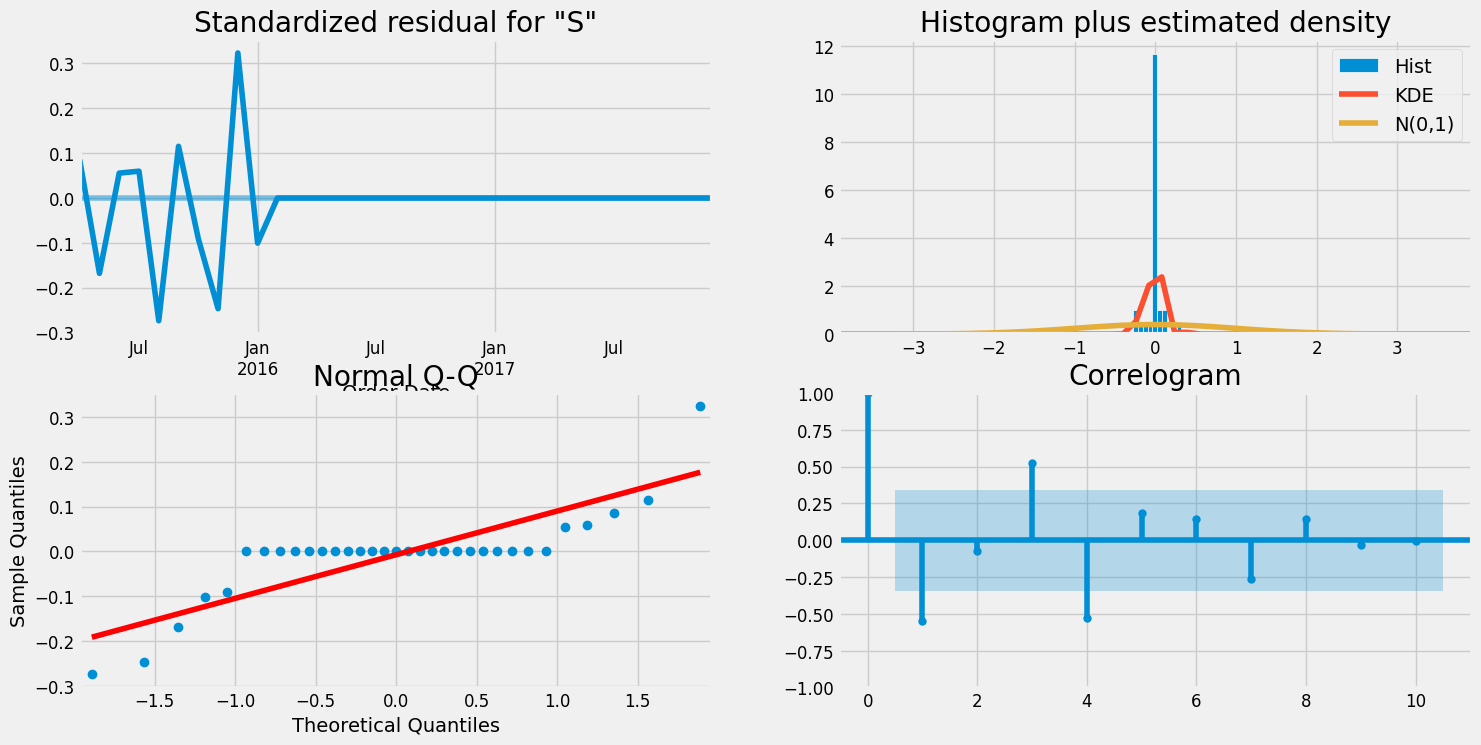

In [45]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

Standardized Residual : The residuals scatters around a mean near zero, as they should, with no obvious trends or patterns indicating misspecification.

Histogram plus estimated density: The data distribution is nearly normal.

Normal Q-Q : The plots show sample quantiles versus theoretical quantiles. Those are the quantiles from the standard Normal distribution with mean 0 and standard deviation 1. The points seem to fall about a straight line. This graphs to help us assess if a set of data plausibly came from some theoretical distribution such as a Normal or exponential

Correlogram : There is no evidence of autocorrelation outside of the Bartlett two-standard-error bands for white noise, given by the blue lines.

The model diagnostics indicates that the model residuals are near normally distributed

<font color = red><font size = 4>Validating Forecasts</font></br>
<font color = black><font size = 2>We compare predicted sales to real sales of the time series to understand the accuracy of our forecasts

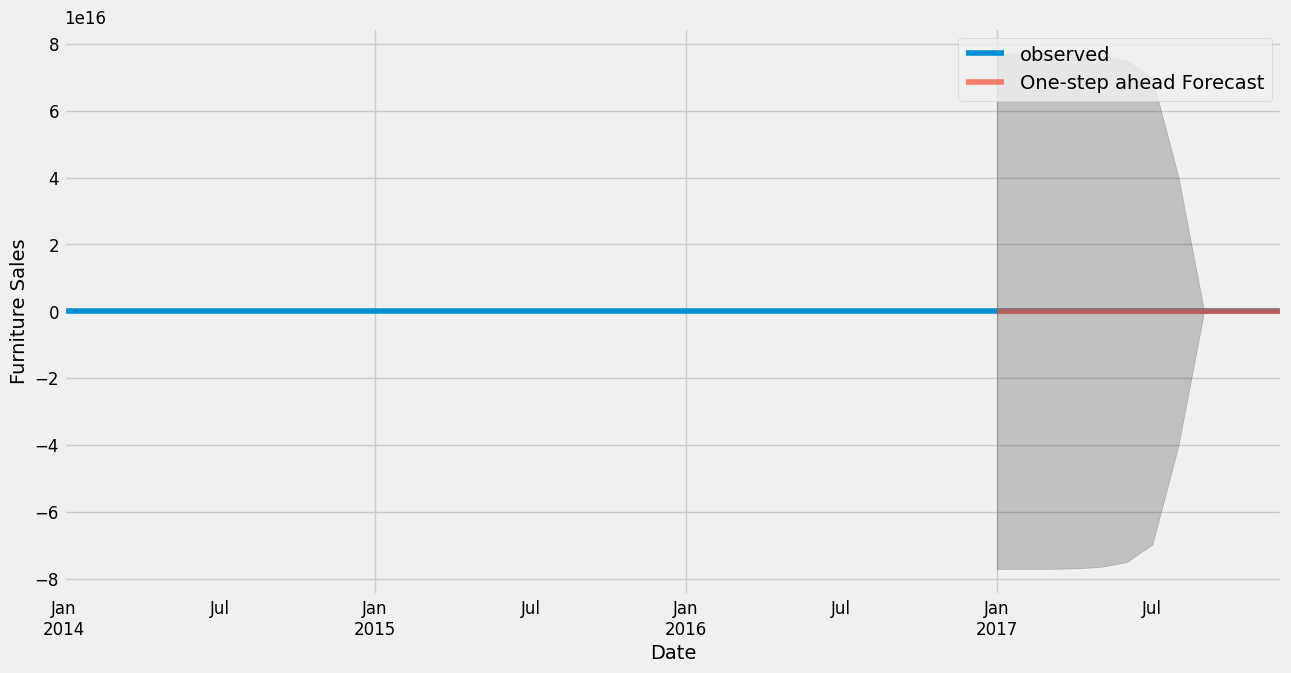

In [46]:
#set forecasts to start at 2017–01–01 to the end of the data to forecast
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

The above plot indicates the observed value and the rolling forecast predications (A rolling forecast is an add/drop process for predicting the future over a set period of time). The predicated values align well with the true values.

<font color = red><font size = 4>Calculating RMSE

In [47]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 130535474266.38


RMSE tells us that our model was able to forecast the average daily furniture sales in the test set within 151.64 of the real sales.

<font color = red><font size = 4>Visualizing the Forecast 

             lower Sales   upper Sales
2018-01-01           NaN           NaN
2018-02-01           NaN           NaN
2018-03-01           NaN           NaN
2018-04-01 -2.638731e+16  2.638772e+16
2018-05-01 -4.992353e+16  4.992394e+16
2018-06-01 -6.656173e+16  6.656214e+16
2018-07-01 -7.941812e+16  7.941853e+16
2018-08-01 -9.061171e+16  9.061212e+16
2018-09-01 -1.005102e+17  1.005106e+17
2018-10-01 -1.095402e+17  1.095406e+17
2018-11-01 -1.178714e+17  1.178718e+17
2018-12-01 -1.256551e+17  1.256556e+17
2019-01-01 -1.329826e+17  1.329830e+17


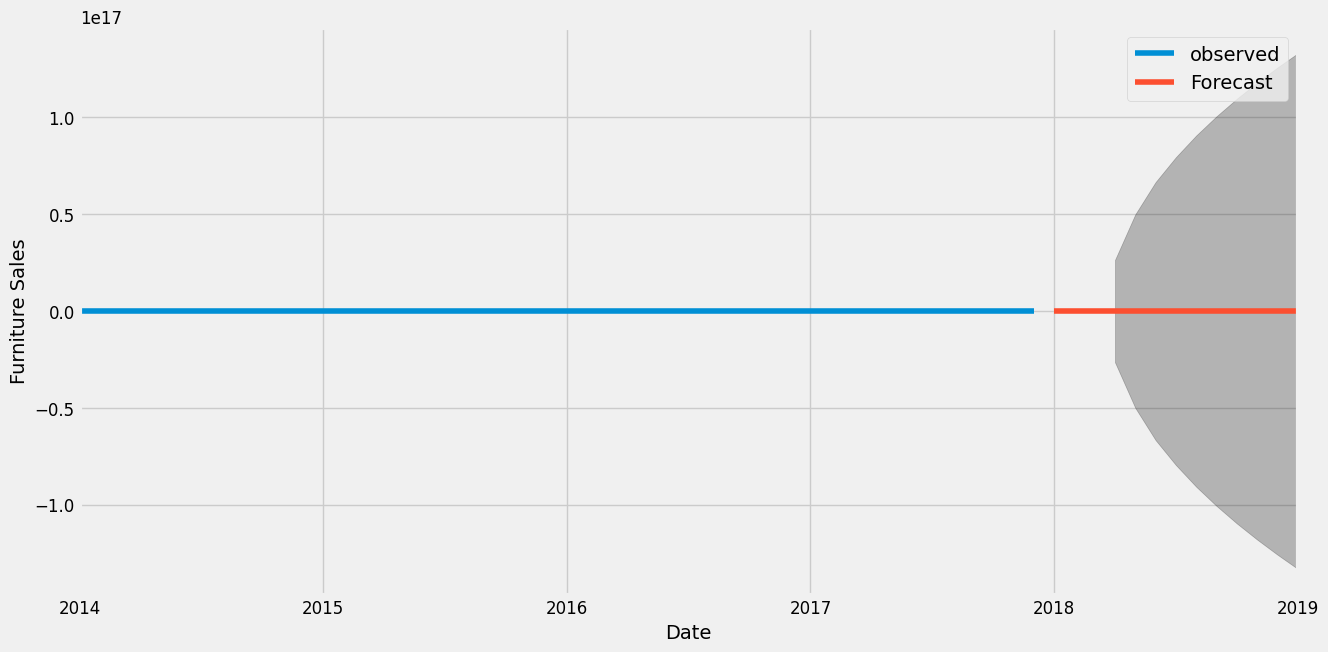

In [48]:
pred_uc = results.get_forecast(steps=13)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
print(pred_ci)
plt.legend()
plt.show()

<font color = red><font size = 5>Conclusion

We observe that sales of furniture produces seasonal pattern. Early of the year is the off season for furniture sales in the superstore. The sales for furniture increases linearly over time in a year.